<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [21]:
# Isi dengan data diri Anda
NAMA = "Valencius Apriady Primayudha"
KELAS = "D"
NPM = "2106750830"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [22]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valencius Apriady Primayudha dari kelas D dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valencius Apriady Primayudha)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [23]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [24]:
# TODO: Open your dataset
ecoli_df = pd.read_csv('./ecoli.csv')
ecoli_df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [25]:
ecoli_df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


In [26]:
ecoli_df.shape

(336, 8)

Mendeteksi kebereadaan missing value

In [27]:
ecoli_df.isnull().sum()

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64

Cek Keberadaan outliers

In [28]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

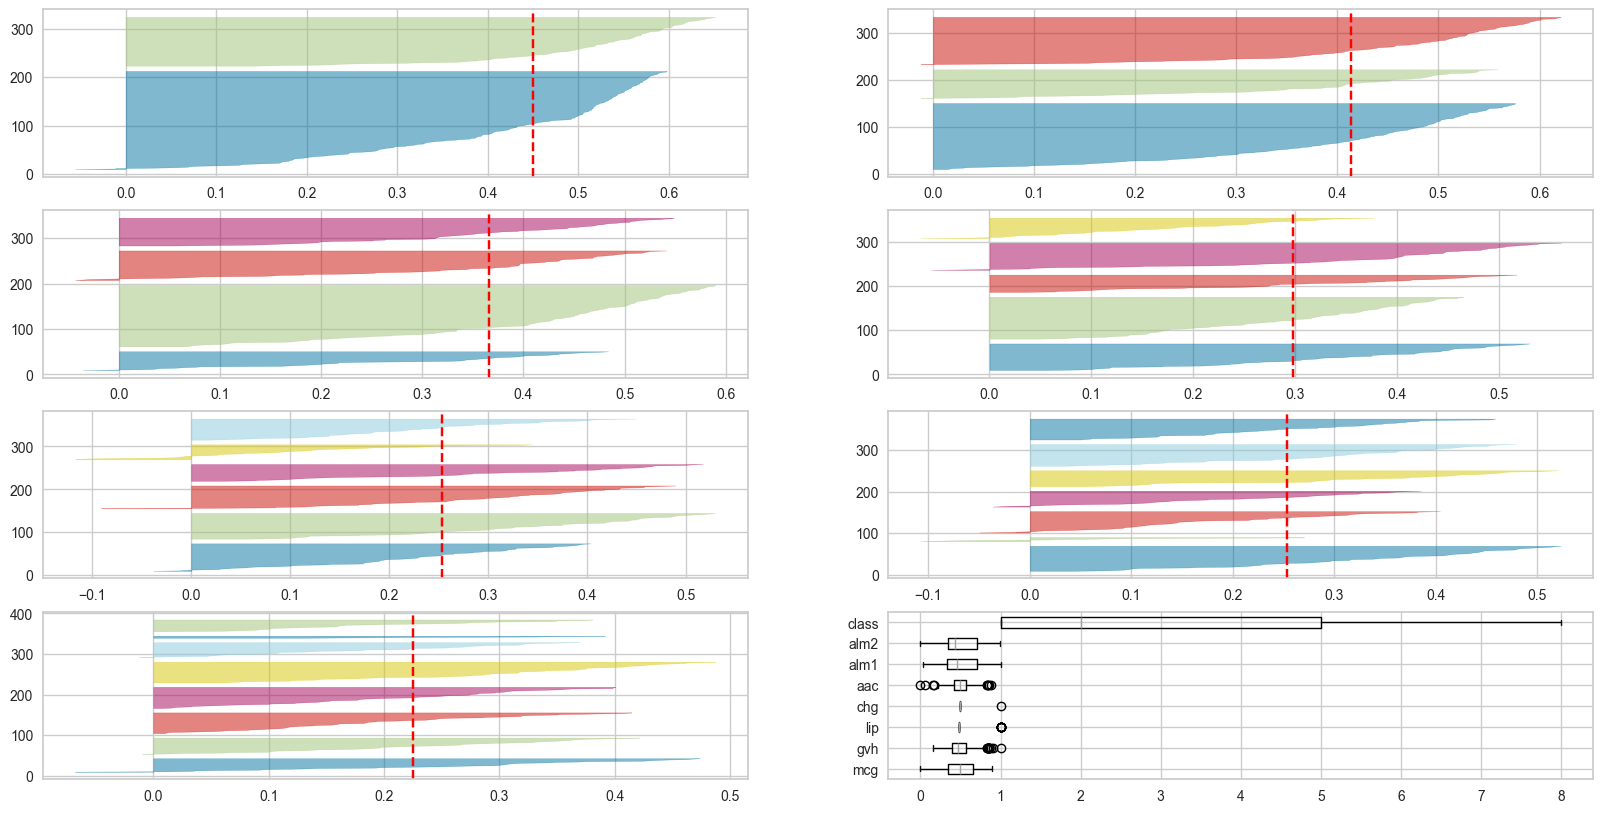

In [29]:
ecoli_df.boxplot(vert=False,figsize=(20,20))
plt.show()

In [30]:
check_outlier(ecoli_df)

Outlier pada tiap atribut:
mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64


Drop semua outliers yang ada

In [31]:
def delete_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    no_outliers_mask = ((df >= lower_limit) & (df <= upper_limit)).all(axis=1)
    return df[no_outliers_mask]
    

In [32]:
ecoli_df_clean = delete_outlier(ecoli_df)

In [33]:
x_df = ecoli_df_clean.drop("class", axis=1)

In [34]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = x_df

## K-Means Clustering [35]

In [35]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_coefficient is : 0.45014924255312944
For n_clusters = 3 The average silhouette_coefficient is : 0.4135305758152871
For n_clusters = 4 The average silhouette_coefficient is : 0.36945465267261196
For n_clusters = 5 The average silhouette_coefficient is : 0.2994785704386099
For n_clusters = 6 The average silhouette_coefficient is : 0.25132339604387033
For n_clusters = 7 The average silhouette_coefficient is : 0.2578093481169583
For n_clusters = 8 The average silhouette_coefficient is : 0.22603586573602547


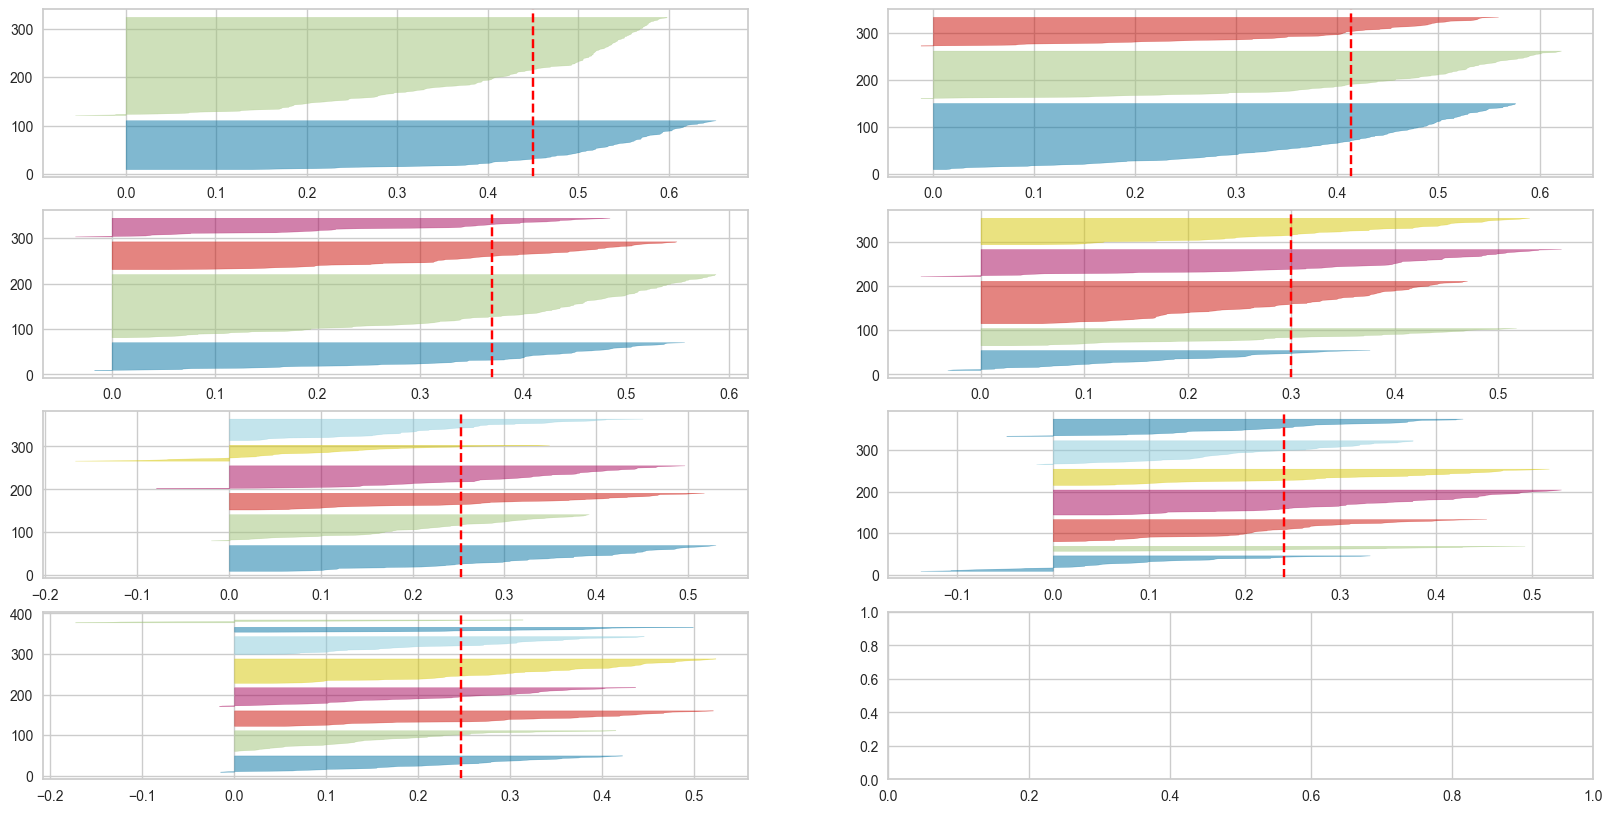

In [36]:
plt.show()

In [37]:
kmeans = KMeans(n_clusters=2)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('gvh', 'alm1'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

C:\Users\Valencius Apriady\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gvh,alm1,Clusters
0,0.29,0.24,0
1,0.40,0.35,0
2,0.40,0.37,0
3,0.49,0.45,0
4,0.32,0.25,0
...,...,...,...
331,0.56,0.68,0
332,0.57,0.35,0
333,0.60,0.39,0
334,0.61,0.42,0


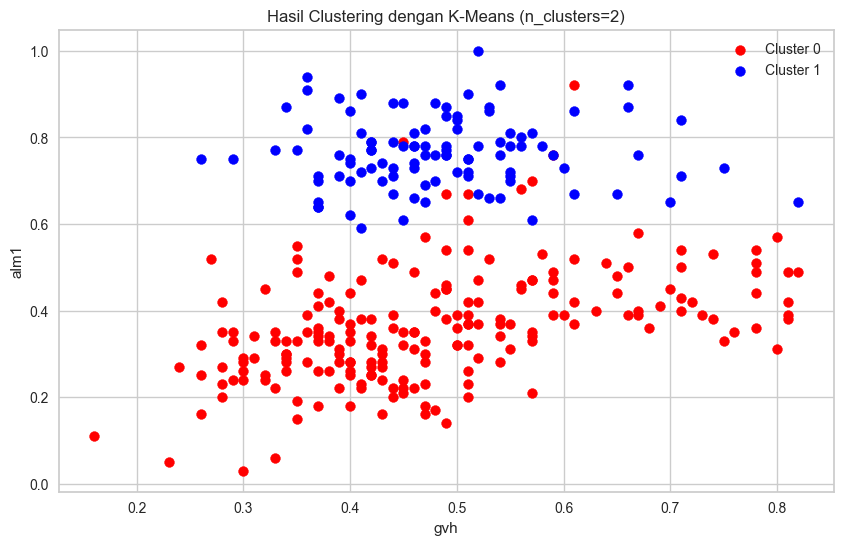

In [38]:
# Memisahkan data berdasarkan cluster
cluster_0 = data_with_clusters[data_with_clusters['Clusters'] == 0]
cluster_1 = data_with_clusters[data_with_clusters['Clusters'] == 1]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0['gvh'], cluster_0['alm1'], label='Cluster 0', s=50, c='red')
plt.scatter(cluster_1['gvh'], cluster_1['alm1'], label='Cluster 1', s=50, c='blue')

# Menambahkan label dan legenda
plt.xlabel('gvh')
plt.ylabel('alm1')
plt.title('Hasil Clustering dengan K-Means (n_clusters=2)')
plt.legend()

# Menampilkan plot
plt.show()

## Hierarchical Clustering [35]

In [39]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [40]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

C:\Users\Valencius Apriady\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([223, 233, 263, 209, 262, 217, 285, 156, 226, 279, 181, 259, 297,
       224, 166, 284, 270, 234, 303, 211, 163, 159, 164, 195, 258, 295,
       296, 245, 305, 292, 147, 275, 222, 294, 215, 290, 283, 154, 248,
       273, 300, 172, 260, 155, 216, 280, 237, 213, 210, 291, 214, 261,
       116, 193, 170, 179, 247, 250, 220, 219, 289, 221, 254, 104, 185,
       225, 268, 204, 304, 162, 194, 271, 301, 218, 253, 144, 244, 255,
       265, 288, 152, 257, 272, 177, 165, 153, 232, 191, 189, 277,  82,
       202, 256, 106, 282, 229,  96, 160, 123, 184, 174, 196, 201, 298,
       243, 241, 231, 148, 206, 197, 129, 293, 183, 188, 267, 251, 187,
       207, 299, 192, 266, 139, 141, 161, 228,  91, 135,  77, 200, 151,
       168, 186,  73, 249, 149, 212, 146,  92, 281,  80, 108, 112, 175,
       182, 264,  81, 274, 302, 235, 205, 239, 178, 238, 107,  88,  95,
       269, 278, 287, 276, 157,  97, 230,  90, 131, 286, 105, 167, 180,
        40, 242, 236, 199, 158, 145, 171, 109, 240,  72, 114, 12

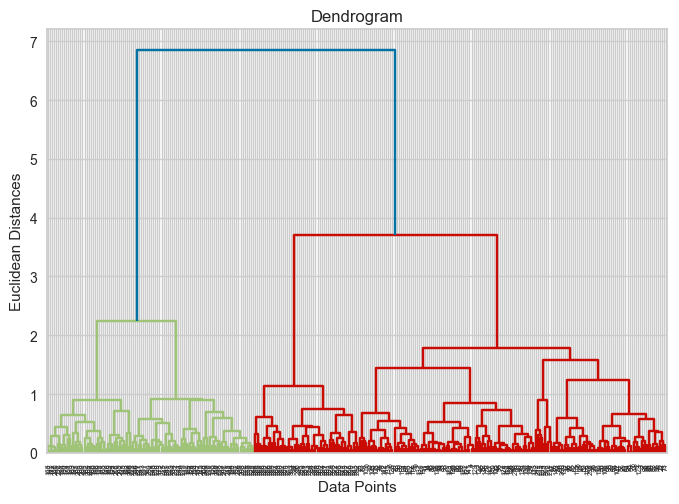

In [41]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.
dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [42]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

C:\Users\Valencius Apriady\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,gvh,alm1,Clusters,Agg_clusters
0,0.29,0.24,0,0
1,0.40,0.35,0,0
2,0.40,0.37,0,0
3,0.49,0.45,0,0
4,0.32,0.25,0,0
...,...,...,...,...
331,0.56,0.68,0,0
332,0.57,0.35,0,0
333,0.60,0.39,0,0
334,0.61,0.42,0,0


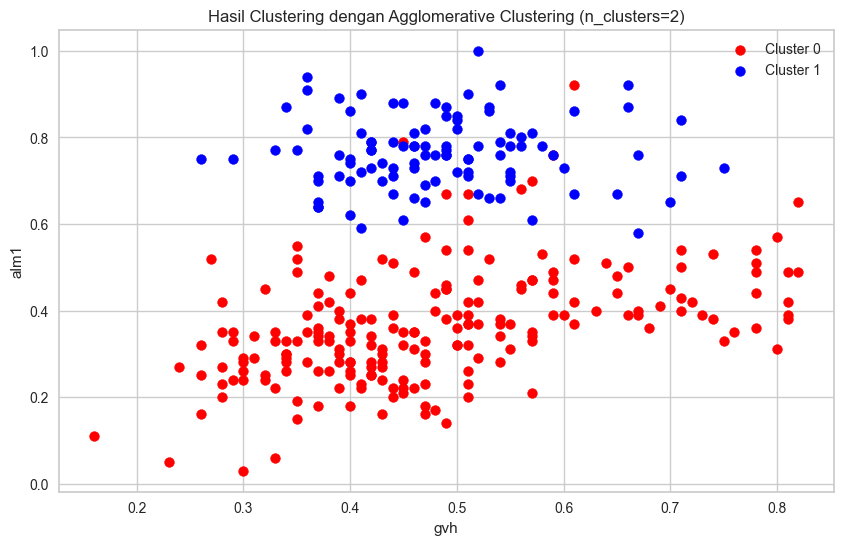

In [43]:
# Memisahkan data berdasarkan cluster hasil Agglomerative Clustering
cluster_0 = data_with_clusters[data_with_clusters['Agg_clusters'] == 0]
cluster_1 = data_with_clusters[data_with_clusters['Agg_clusters'] == 1]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0['gvh'], cluster_0['alm1'], label='Cluster 0', s=50, c='red')
plt.scatter(cluster_1['gvh'], cluster_1['alm1'], label='Cluster 1', s=50, c='blue')

# Menambahkan label dan legenda
plt.xlabel('gvh')
plt.ylabel('alm1')
plt.title('Hasil Clustering dengan Agglomerative Clustering (n_clusters=2)')
plt.legend()

# Menampilkan plot
plt.show()

# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

> Dari hasil interpretasi clustering menggunakan KMeans terlihat abhwa jumlah cluster yang digunakan adalah 2. Terlihat dari hasil visualisasi plot yang dihasilkan bahwa clustering pada kedua wilayah yang terbentuk memiliki separasi antar cluster yang cukup baik. Hal tersebut terlihat dari jumlah data tumpah tindih yang cukup sedikit sehingga dapat dikatakan algoritma KMeans berhasil untuk membagi data menjadi dua partisi dengan efektif.

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

> 1. Mean shift: algoritma ini bekerja dengan memperbarui kandidat centroid menjadi rata-rata dari titik-titik dalam jendela lokalnya. Means shift tidak memerlukan spesifikasi jumlah kluster di awal. pembaruan kandidat centroid tersebut kemudian dilakukan berulang kali sampai mencapai tahap konvergensi
> 2. Special Clustering: Algoritma ini menggunakan eigenvektor dari matriks laplacian grafik yang dibangun dari data. Dimulai dengan menciptakan matriks kesamaan, mengubah masalah clustering menjadi grafik, memetakan titik data ke dimensi yang lebih rendah dengan eigenvektor, dan menjalankan algoritma klustering standar pada dimensi yang lebih rendah untuk mendapatkan kluster 
> 3. Affinity Propagation: Algoritma ini mengirimkan pesan antara pasangan titik data hingga muncul satu set contoh yang baik (exemplar), yang mewakili setiap kluster. Proses pengerjaannya tidak memerlukan penentuan jumlah kluster di awal, mengasumsikan bahwa semua titik adalah calon centroid potensial, dan menggunakan teknik pembaruan pesan untuk iteratif memilih centroid yang paling sesuai.
> 4. Gaussian Mixture Models: algoritma ini menggunakan pendekatan dengan asumsi sebuah asumsi bahwa data dihasilkan dari campuran beberapa distribusi gaussian yang tidak diketahui. Setiap distribusinya memiliki beberapa parameter, seperti mean dan variance, serta berhubunga dengan satu kluster. Untuk menemukan parameter yang paling mungkin untuk gaussian diperlukan Expectation-Maximation. 

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

> 1. Silhoutte Coefficient: digunakan untuk mengukur seberapa serupa objek dengan clusternya sendiri dibandingkan dengan cluster lain. Hasilnya berupa nilai dari -1 sampai 1 dimana nilai tinggi menunjukkan bahwa objek cocok dengan klusternya dan kurang cocok dengan kluster tetangga 
> 2. Davies-Bouldin Index: metrik yang mengukur kualitas pembagian suatu set data ke dalam beberapa kluster. Nilai yang lebih rendah akan menunjukkan pembagian yang lebih baik dan menandakan kluster yang lebi terpisah dan lebih padat
> 3. Calinski-Harabasz Index: rasio antara dispersi inter-kluster dan dispersi intra-kluster untuk semua kluster. Nilai indeks yang lebih tinggi menunjukkan kluster yang lebih terdefinisi dengan baik.

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

> Intra-cluster similarity mengukur seberapa dekat titik-titik data dalam kluster yang sama. Idealnya, sebuah kluster yang baik terdiri dari titik-titik yang sangat serupa atau dekat satu sama lain. Cara menghitungnya adalah dengan mengukur jarak dari titik-titik tersebut menggunakan metrik jarak apapun, contoh euclidean, dan kemudian hitung rata-ratanya. Semakin rendah nilai rata-rata tersebut maka semakin tinggi kemiripan intra-cluster. Jadi nilai intra-cluster yang tinggi berarti nilai rata-rata jarak antar data dekat. 

> Inter-cluster dissimilarity mengukur seberapa jauh atau berbeda kluster yang satu dari kluster yang lain. Kluster yang baik tidak hanya memiliki titik-titik yang mirip di dalamnya tetapi juga jauh dari titik-titik di kluster lain. Pilih metrik jarak yang sama seperti yang digunakna pada intra-cluster dan hitung jarak antara centroid kluster atau hitung menggunakan metode linkage yang berbeda. Nilai rata-rata tersebut kekmudian menjadi ukuran inter-cluster dissimilarity. Semakin tinggi nilainya, maka semakin baik pemisahan antar kluster.

> Dari pemahaman saya maka suatu kluster dianggap baik jika memilki nilai intra-cluster similarity yang tinggi dan inter-cluster similarity yang tinggi juga. Hal tersebut dikarenakan dengan nilai intra-cluster similarity tinggi berarti nilai data-data pada suatu kluster berdekatan dan dengan nilai inter-cluster yang tinggi berarti jarak antar kluster nya tinggi sehingga klusternya terpisah dengan baik 

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

> Algoritma KMeans menggunaan jarak euclidean untuk menentukan kedekatan antara titik data dan centroid. Hal tersebut membuat algoritma KMeans cukup sensitif terhadap outliers dan membuatnya hanya akan mencapai kondisi ideal jika data bersifat globural atau data terbentuk dalam bentuk bulat di sekitar centroid. Jika terdapat data-data yang terdistribusi dengan bentuk memanjang maka jarak euclidean tidak mampu untuk menangkap kedekatan antar titik secara akurat. Jadi dapat disimpulkan untuk data dengan pengelompokan yang tidak bersifat globural atau dengan data yang memiliki distribusi yang lebih kompleks, penggunaan algoritma KMeans mungkin akan lebih tidak efektif.

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_